## Data Exploration

In [91]:
import pandas as pd
import numpy as np

In [92]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
data['class'] = data['area'].map(lambda x: 1 if x > 0 else 0)

In [93]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,class
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0


In [94]:
data.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,class
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,4.667382,4.287554,7.495708,4.266094,90.683262,111.262017,550.372961,8.962017,18.919742,43.984979,4.042275,0.024034,12.868326,0.521459
std,2.338754,1.247335,2.275863,2.069234,5.481870,63.186975,245.357891,4.038433,5.786402,16.294131,1.813816,0.311675,65.244220,0.500076
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.300000,69.150000,444.725000,6.700000,15.600000,32.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.400000,661.800000,8.400000,19.300000,41.000000,4.000000,0.000000,0.495000,1.000000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.125000,712.225000,10.775000,22.800000,53.000000,5.400000,0.000000,7.005000,1.000000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,22.700000,33.100000,100.000000,9.400000,6.400000,1090.840000,1.000000


### Part a:

#### X, Y, month, day features are categorical features. Other all features are continuous.

In [95]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

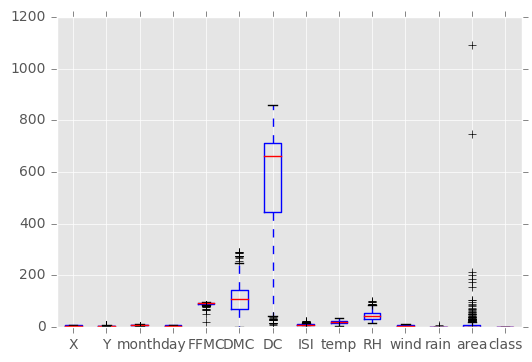

In [96]:
# pd.options.display.mpl_style = 'default'
data.boxplot()
plt.show()

***From the box plot of training data, we can see that RH, DC and DMC have a relatively even normal distribution. Area, FFMC have a lot of outliers.*** 

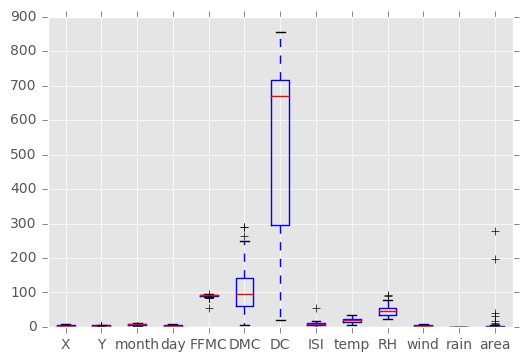

In [97]:
test_data.boxplot()
plt.show()

***The box plot of the testing data shows DMC, DC, temperature and RH have a relatively normal distribution. Area, FFMC have a lot of outliers.***

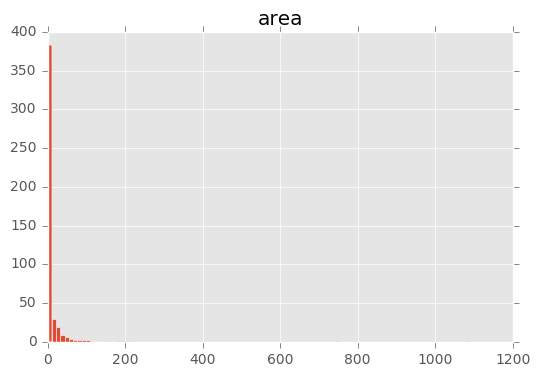

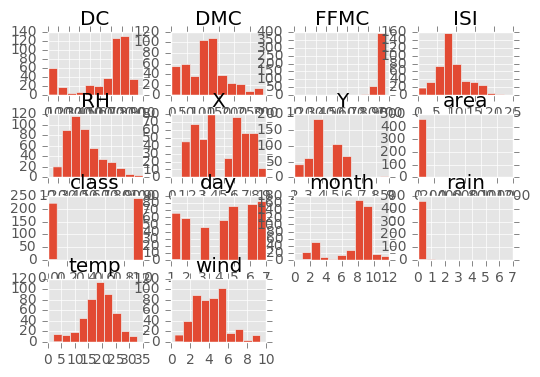

In [98]:
data.hist(column='area', bins=100)
data.hist()
plt.show()

***From the histogram, we see that area, rain and FFMC have a skewed distribution and a lot of outliers. DC, DMC, area, temp and wind have a relatively even distribution.***

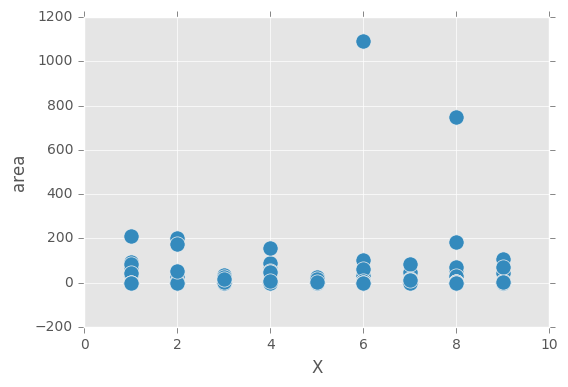

In [99]:
data.plot(kind='scatter', x='X', y='area', s=120)
plt.show()

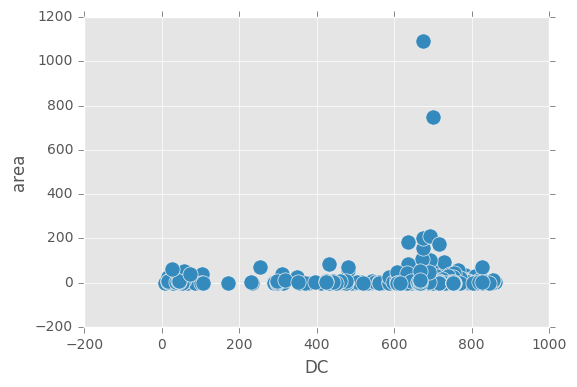

In [100]:
data.plot(kind='scatter', x='DC', y='area', s=120)
plt.show()

In [101]:
data.corr(method='pearson', min_periods=1)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,class
X,1.000000,0.544467,-0.074813,-0.050995,-0.019071,-0.074230,-0.099268,-0.015503,-0.062697,0.075150,0.026997,0.068226,0.048168,0.084264
Y,0.544467,1.000000,-0.066987,-0.017211,-0.038105,-0.006066,-0.102581,-0.010763,-0.012945,0.047617,-0.014985,0.035289,0.040896,0.065935
month,-0.074813,-0.066987,1.000000,-0.062319,0.296926,0.463923,0.868464,0.213435,0.378051,-0.114101,-0.073855,0.013486,0.057979,0.110621
day,-0.050995,-0.017211,-0.062319,1.000000,-0.030926,0.060716,-0.005391,0.004609,0.067129,0.084504,0.021979,-0.051286,0.030731,-0.047095
FFMC,-0.019071,-0.038105,0.296926,-0.030926,1.000000,0.403499,0.328637,0.579155,0.434196,-0.278075,-0.036094,0.059621,0.042333,0.059281
DMC,-0.074230,-0.006066,0.463923,0.060716,0.403499,1.000000,0.677610,0.362010,0.476427,0.078873,-0.094046,0.079403,0.073255,0.042457
DC,-0.099268,-0.102581,0.868464,-0.005391,0.328637,0.677610,1.000000,0.277695,0.501967,-0.039574,-0.194147,0.037438,0.052364,0.072518
ISI,-0.015503,-0.010763,0.213435,0.004609,0.579155,0.362010,0.277695,1.000000,0.428813,-0.119176,0.109773,0.081645,0.015316,0.042946
temp,-0.062697,-0.012945,0.378051,0.067129,0.434196,0.476427,0.501967,0.428813,1.000000,-0.515995,-0.237206,0.073071,0.095699,0.056559
RH,0.075150,0.047617,-0.114101,0.084504,-0.278075,0.078873,-0.039574,-0.119176,-0.515995,1.000000,0.077764,0.106699,-0.084007,-0.024637


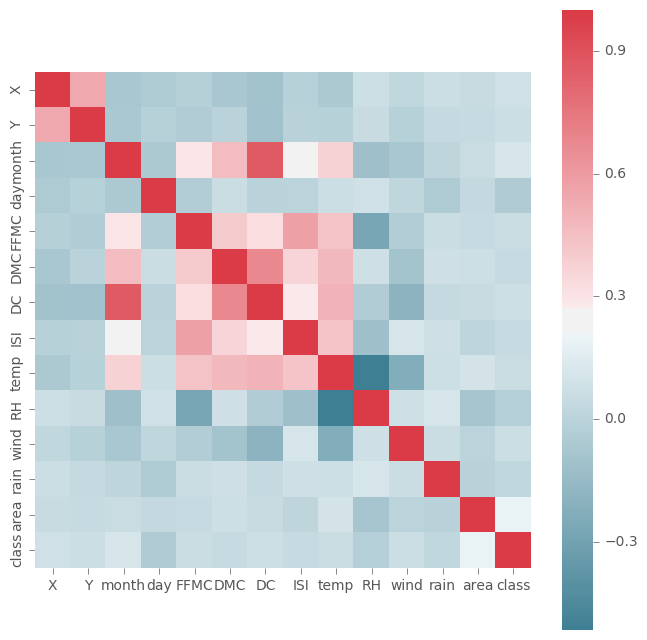

In [102]:
import seaborn as sns
corr = data.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)
plt.show()

***From the correlation matrix, we see that month and DC are highly correlated. (DMC and DC), (FFMC and ISI), (DMC and temp), (DMC and month) and (DMC and temp) are also correlated.*** 

## K-Nearest Neighbor Implementation

In [103]:
'''Getting max values of each column in a dictionary from training data'''
import collections
train_max_values = collections.defaultdict(int)
for i in range(len(data.max())):
    train_max_values[list(data)[i]] = data.max()[i]
print train_max_values

'''Getting max values of each column in a dictionary from testing data'''
test_max_values = collections.defaultdict(int)
for i in range(len(test_data.max())):
    test_max_values[list(test_data)[i]] = test_data.max()[i]
print test_max_values

defaultdict(<type 'int'>, {'DMC': 291.30000000000001, 'temp': 33.100000000000001, 'area': 1090.8399999999999, 'class': 1.0, 'DC': 860.60000000000002, 'rain': 6.4000000000000004, 'month': 12.0, 'ISI': 22.699999999999999, 'FFMC': 96.200000000000003, 'Y': 9.0, 'X': 9.0, 'RH': 100.0, 'day': 7.0, 'wind': 9.4000000000000004})
defaultdict(<type 'int'>, {'DMC': 290.0, 'temp': 33.299999999999997, 'area': 278.52999999999997, 'DC': 855.29999999999995, 'rain': 0.0, 'month': 12.0, 'ISI': 56.100000000000001, 'FFMC': 96.099999999999994, 'Y': 6.0, 'X': 9.0, 'RH': 94.0, 'day': 7.0, 'wind': 8.0})


In [104]:
'''Getting min values of each column in a dictionary from training data'''
train_min_values = collections.defaultdict(int)
for i in range(len(data.min())):
    train_min_values[list(data)[i]] = data.min()[i]
print train_min_values

'''Getting min values of each column in a dictionary from testing data'''
test_min_values = collections.defaultdict(int)
for i in range(len(test_data.min())):
    test_min_values[list(test_data)[i]] = test_data.min()[i]
print test_min_values

defaultdict(<type 'int'>, {'DMC': 1.1000000000000001, 'temp': 2.2000000000000002, 'area': 0.0, 'class': 0.0, 'DC': 7.9000000000000004, 'rain': 0.0, 'month': 1.0, 'ISI': 0.0, 'FFMC': 18.699999999999999, 'Y': 2.0, 'X': 1.0, 'RH': 15.0, 'day': 1.0, 'wind': 0.40000000000000002})
defaultdict(<type 'int'>, {'DMC': 6.5999999999999996, 'temp': 5.0999999999999996, 'area': 0.0, 'DC': 18.699999999999999, 'rain': 0.0, 'month': 2.0, 'ISI': 0.40000000000000002, 'FFMC': 53.399999999999999, 'Y': 2.0, 'X': 1.0, 'RH': 22.0, 'day': 1.0, 'wind': 0.90000000000000002})


In [105]:
training_set = []
import csv
import math
with open('train.csv') as f:
    reader = csv.DictReader(f, delimiter=',')
    for line in reader:
        training_set.append(line)

testing_set = []
with open('test.csv') as f:
    reader = csv.DictReader(f, delimiter=',')
    for line in reader:
        testing_set.append(line)

In [106]:
'''Normalizing the training data'''
def train_normalize(instance):
    normalized_instance = {}
    for key in instance:
        normalized_instance[key] = (float(instance[key]) - \
                                    float(train_min_values[key])) \
        /(float(train_max_values[key]) - float(train_min_values[key]))
    return normalized_instance

'''Normalizing testing data'''
def test_normalize(instance):
    normalized_instance = {}
    for key in instance:
        if (float(test_max_values[key]) - float(test_min_values[key])) != 0:
            normalized_instance[key] = (float(instance[key]) - \
                                        float(test_min_values[key])) \
            /(float(test_max_values[key]) - float(test_min_values[key]))
        else:
            normalized_instance[key] = 0.0
    return normalized_instance

normalized_training_set = []
'''Normalize all training data'''
def normalize_all_training_data():
    
    for training_instance in training_set:
        normalized_training_instance = {}
        for key in training_instance:
            if (float(train_max_values[key]) - \
                float(train_min_values[key])) != 0:
                normalized_training_instance[key] = \
                (float(training_instance[key]) \
                 - float(train_min_values[key])) \
                /(float(train_max_values[key]) - \
                  float(train_min_values[key]))
            else:
                normalized_training_instance[key] = 0.0
        normalized_training_set.append(normalized_training_instance)

normalized_testing_set = []
'''Normalize all testing data'''
def normalize_all_testing_data():
    
    for testing_instance in testing_set:
        normalized_testing_instance = {}
        for key in testing_instance:
            if (float(test_max_values[key]) - \
                float(test_min_values[key])) != 0:
                normalized_testing_instance[key] = \
                (float(testing_instance[key]) \
                 - float(test_min_values[key])) \
                /(float(test_max_values[key]) - \
                  float(test_min_values[key]))
            else:
                normalized_testing_instance[key] = 0.0
        normalized_testing_set.append(normalized_testing_instance)

normalize_all_training_data()
normalize_all_testing_data()

'''Calculating euclidean distance'''        
def euclideanDist(train_instance,test_instance):
    dist = 0
    for key in test_instance:
        dist += pow((train_instance[key] - test_instance[key]),2)
    return math.sqrt(dist)



### Implementing KNN using the euclidean distance as a distance measure to perform the binary classification task.
***I have normalized the data using Max - min scaling i.e. each feature is translated between 0 and 1.*** 

In [107]:
def getNeighbors(training_kfold, testing_instance, knn):
    distances = []
    for train_instance in training_kfold:
        distance = euclideanDist(train_instance, testing_instance)
        classification = '0' if train_instance['area'] == 0.0 else '1'
        distances.append([distance,classification])
    distances.sort(key=lambda x: x[0])
    count_class_0 = 0
    count_class_1 = 0
    for arr in distances[:knn]:
        if arr[1] == '0':
            count_class_0 += 1
        else:
            count_class_1 += 1
    if count_class_0 > count_class_1:
        return 'class 0'
    else:
        return 'class 1'

def find_accuracy(training_kfold, testing_kfold, knn):
    predicted_value = 0
    true_value = 0
    correctly_classified = 0
    for testing_instance in testing_kfold:
        if float(testing_instance['area']) > 0.0 and \
        getNeighbors(training_kfold, testing_instance, knn) == 'class 1':
            correctly_classified += 1
        if float(testing_instance['area']) == 0.0 and \
        getNeighbors(training_kfold, testing_instance, knn) == 'class 0':
            correctly_classified += 1
    acc = float(correctly_classified)/float(len(testing_kfold))
    return acc

    




***Exploring different values of k using 10-fold cross validation.***

In [108]:
'''Splitting training data into 10 parts for 10-fold cross validation'''
from sklearn.model_selection import KFold
def splitTestTrain(kfold, knn):
    accuracy = 0.0
    np_X = np.array(normalized_training_set)
    kf = KFold(n_splits=kfold)
    for train_index, test_index in kf.split(np_X):
        accuracy += find_accuracy(np_X[train_index].tolist(), \
                                  np_X[test_index].tolist(), knn)
    return accuracy/kfold

accuracy_map = {}
k_values = [1,3,5,7,9,11,13,15,17]
for knn in k_values:
    acc = splitTestTrain(10, knn)
    print "accuracy for k: ", knn, "=", acc
    accuracy_map[knn] = acc



accuracy for k:  1 = 0.44019426457
accuracy for k:  3 = 0.427520814061
accuracy for k:  5 = 0.412395929695
accuracy for k:  7 = 0.399907493062
accuracy for k:  9 = 0.427798334875
accuracy for k:  11 = 0.423450508788
accuracy for k:  13 = 0.436308973173
accuracy for k:  15 = 0.41493987049
accuracy for k:  17 = 0.397733580019


***Scatter Plot for different k and accuracy***

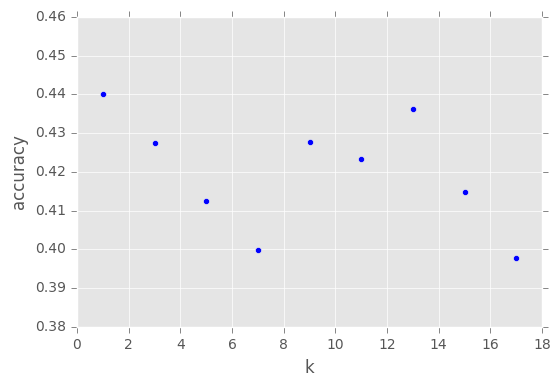

In [109]:
x = np.array(accuracy_map.keys())
y = np.array(accuracy_map.values())
plt.scatter(x, y)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

***I am using a 10-fold cross validation to get the optimum value of k. For k = 13, we get the highest accuracy of  0.436308973173 (excluding k=1).*** 

***Performing k-NN on test data.***

In [110]:
k_values = [1,3,5,7,9,11,13,15,17]
accuracy_test_set = {}
for k in k_values:
    accuracy = 0.0
    predicted_value = 0
    true_value = 0
    correctly_classified = 0
    for testing_instance in normalized_testing_set:
        if float(testing_instance['area']) > 0.0 and \
        getNeighbors(normalized_training_set, testing_instance, k) == 'class 1':
            correctly_classified += 1
        if float(testing_instance['area']) == 0.0 and \
        getNeighbors(normalized_training_set, testing_instance, k) == 'class 0':
            correctly_classified += 1
            testing_instance['area']
    accuracy_test_set[k] = float(correctly_classified)/float(len(testing_set))
for key in accuracy_test_set:
    print "Accuracy for k: ", key, "=", accuracy_test_set[key]
print "Accuracy for best performing k = 13 using CV on test set: ", \
accuracy_test_set[13]


Accuracy for k:  1 = 0.549019607843
Accuracy for k:  3 = 0.509803921569
Accuracy for k:  5 = 0.588235294118
Accuracy for k:  7 = 0.686274509804
Accuracy for k:  9 = 0.705882352941
Accuracy for k:  11 = 0.666666666667
Accuracy for k:  13 = 0.705882352941
Accuracy for k:  15 = 0.666666666667
Accuracy for k:  17 = 0.666666666667
Accuracy for best performing k = 13 using CV on test set:  0.705882352941


*** We see that for k=13, the accuracy on test set is 0.7058823529411765.***

### Bonus Part

In [111]:
def getNeighborsBonus(training_kfold, testing_instance, knn):
    distances = []
    for train_instance in training_kfold:
        distance = hammingDistance(train_instance, testing_instance)
        classification = '0' if train_instance['area'] == 0.0 else '1'
        distances.append([distance,classification])
    distances.sort(key=lambda x: x[0])
    count_class_0 = 0
    count_class_1 = 0
    for arr in distances[:knn]:
        if arr[1] == '0':
            count_class_0 += 1
        else:
            count_class_1 += 1
    if count_class_0 > count_class_1:
        return 'class 0'
    else:
        return 'class 1'

In [112]:
def hammingDistance(train_instance,test_instance):
    dist_euclidean = 0.0
    dist_hamming = 0.0
    for key in test_instance:
        if key == 'day' or key == 'month' or key == 'X' or key == 'Y':
            if train_instance[key ] == test_instance[key]:
                dist_hamming += 0.0
            else:
                dist_hamming += 1.0
        else:
            dist_euclidean += pow((train_instance[key] - \
                                   test_instance[key]),2)
    dist = 0.0
    dist = math.sqrt(dist_euclidean) + dist_hamming
    return dist

In [113]:
k_values = [1,3,5,7,9,11,13,15,17]
accuracy_test_set = {}
for k in k_values:
    accuracy = 0.0
    predicted_value = 0
    true_value = 0
    correctly_classified = 0
    for testing_instance in normalized_testing_set:
        if float(testing_instance['area']) > 0.0 and \
        getNeighborsBonus(normalized_training_set, testing_instance, k) \
        == 'class 1':
            correctly_classified += 1
        if float(testing_instance['area']) == 0.0 and \
        getNeighborsBonus(normalized_training_set, testing_instance, k) \
        == 'class 0':
            correctly_classified += 1
            testing_instance['area']
    accuracy_test_set[k] = float(correctly_classified)\
    /float(len(testing_set))
for key in accuracy_test_set:
    print "Accuracy for k: ", key, "=", accuracy_test_set[key]

Accuracy for k:  1 = 0.470588235294
Accuracy for k:  3 = 0.450980392157
Accuracy for k:  5 = 0.450980392157
Accuracy for k:  7 = 0.470588235294
Accuracy for k:  9 = 0.411764705882
Accuracy for k:  11 = 0.392156862745
Accuracy for k:  13 = 0.392156862745
Accuracy for k:  15 = 0.450980392157
Accuracy for k:  17 = 0.607843137255


**We get best accuracy using hamming distance for categorical features on test set for k = 17. The accuracy for k = 17 is 0.607843137255 **